In [2]:
import numpy as np
import matplotlib.pyplot as plt

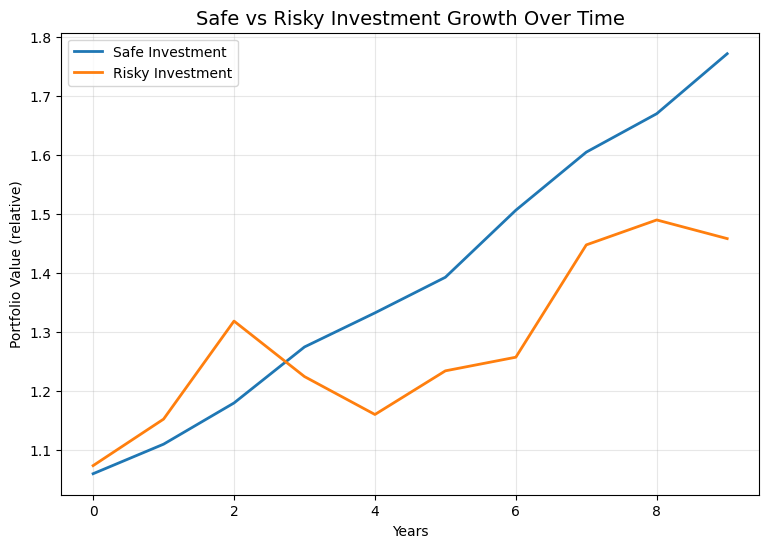

Safe Std Dev: 0.013718118605889899
Risky Std Dev: 0.07165639736308028


In [3]:
np.random.seed(42)

# Simulated yearly returns (%)
safe_returns = np.random.normal(0.05, 0.02, 10)  # mean 5%, low risk
risky_returns = np.random.normal(0.12, 0.10, 10) # mean 12%, high risk

# Compute cumulative growth
safe_growth = np.cumprod(1 + safe_returns)
risky_growth = np.cumprod(1 + risky_returns)

plt.figure(figsize=(9,6))
plt.plot(safe_growth, label="Safe Investment", linewidth=2)
plt.plot(risky_growth, label="Risky Investment", linewidth=2)
plt.title("Safe vs Risky Investment Growth Over Time", fontsize=14)
plt.xlabel("Years")
plt.ylabel("Portfolio Value (relative)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("Safe Std Dev:", np.std(safe_returns))
print("Risky Std Dev:", np.std(risky_returns))

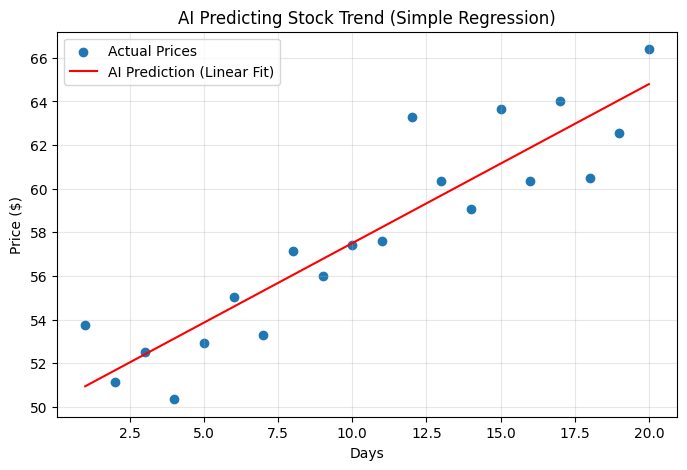

Model Equation: price = 0.73 * day + 50.21


In [4]:
# Simulated time (days) and stock prices
days = np.arange(1, 21)
prices = 50 + 0.8*days + np.random.normal(0, 2, 20)  # noisy linear trend

# Fit a regression line
m, c = np.polyfit(days, prices, 1)
predicted = m*days + c

plt.figure(figsize=(8,5))
plt.scatter(days, prices, label="Actual Prices")
plt.plot(days, predicted, color="red", label="AI Prediction (Linear Fit)")
plt.title("AI Predicting Stock Trend (Simple Regression)")
plt.xlabel("Days")
plt.ylabel("Price ($)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"Model Equation: price = {m:.2f} * day + {c:.2f}")

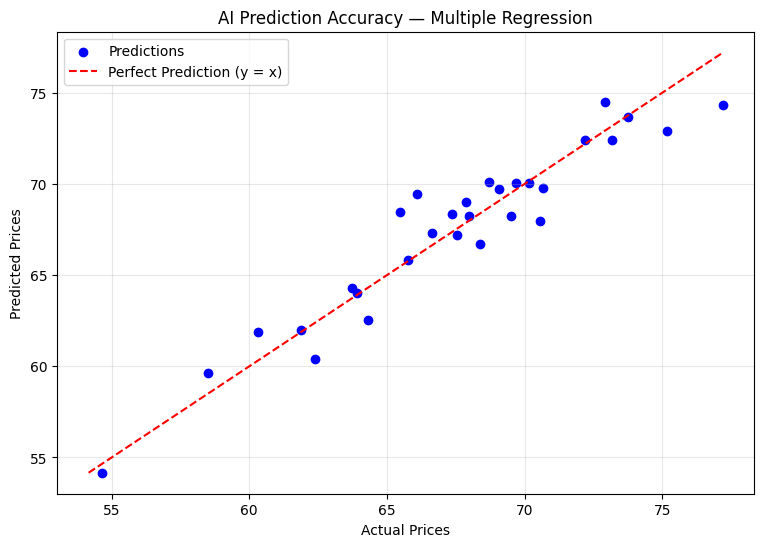

Intercept (b0): 48.29
Volume Weight (b1): 0.0033
Sentiment Weight (b2): 15.7346


In [12]:
from sklearn.linear_model import LinearRegression

# Simulated data
np.random.seed(0)
volume = np.random.randint(1000, 5000, 30)
sentiment = np.random.uniform(0, 1, 30)
price = 50 + 0.003*volume + 15*sentiment + np.random.normal(0, 2, 30)

# Combine features into one dataset
X = np.column_stack((volume, sentiment))
y = price

# Train model
model = LinearRegression()
model.fit(X, y)

# Predictions
predicted = model.predict(X)

# --- Plot actual vs predicted ---
plt.figure(figsize=(9,6))
plt.scatter(y, predicted, color='blue', label='Predictions')

# --- Add 45° perfect prediction line ---
min_val = min(min(y), min(predicted))
max_val = max(max(y), max(predicted))
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='Perfect Prediction (y = x)')

# --- Titles and labels ---
plt.title("AI Prediction Accuracy — Multiple Regression")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.legend()
plt.grid(True, alpha=0.3)

plt.show()

# --- Print model details ---
print(f"Intercept (b0): {model.intercept_:.2f}")
print(f"Volume Weight (b1): {model.coef_[0]:.4f}")
print(f"Sentiment Weight (b2): {model.coef_[1]:.4f}")
